### Libraries

In [18]:
import pandas as pd
from kafka import KafkaProducer, KafkaConsumer
from time import sleep
import time
from json import dumps, loads
import json
import matplotlib.pyplot as plt
import s3fs
from s3fs import S3FileSystem
from datetime import datetime

### Initialising the consumer and receiving the data to store into S3 bucket

Listening to Kafka topic: demo_testing1
Received data: {'Time': '18:40:13', 'Price': 1221.5}


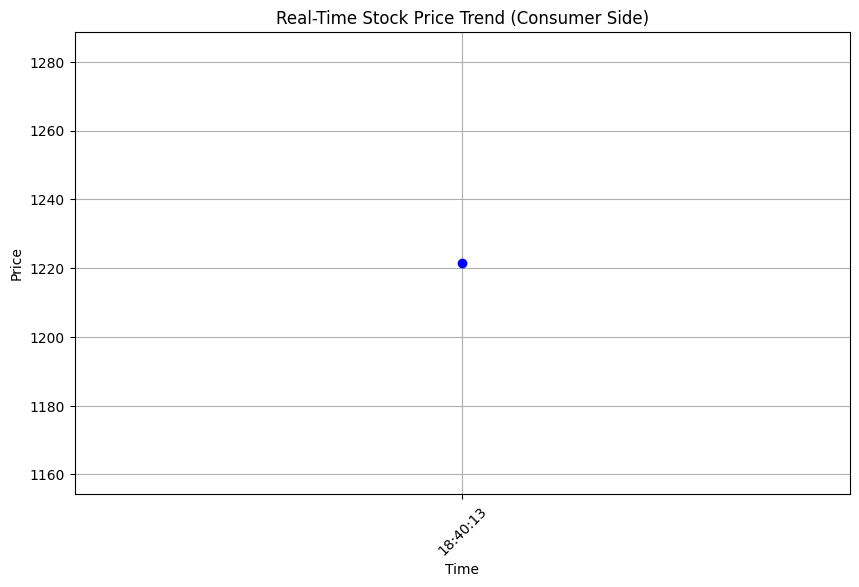

Data saved to S3 bucket stock-kafka-tanishq with filename s3://stock-kafka-tanishq/stock_data_2024-12-27_18-40-14.csv
Received data: {'Time': '18:40:19', 'Price': 1221.5}


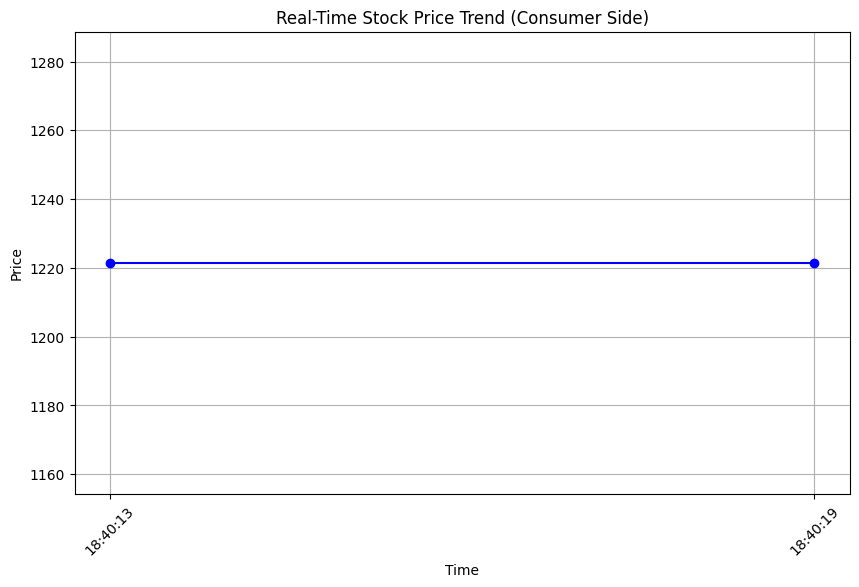

Data saved to S3 bucket stock-kafka-tanishq with filename s3://stock-kafka-tanishq/stock_data_2024-12-27_18-40-22.csv
Received data: {'Time': '18:40:25', 'Price': 1221.5}


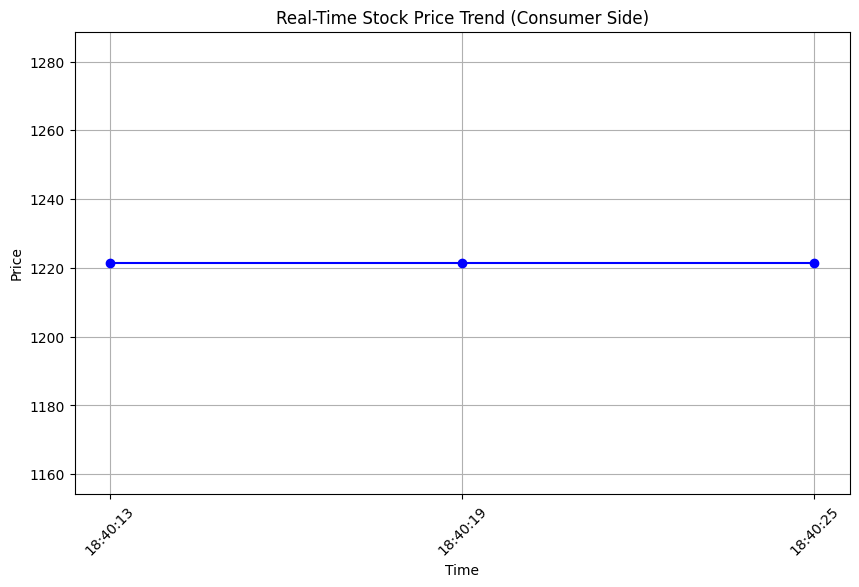

Data saved to S3 bucket stock-kafka-tanishq with filename s3://stock-kafka-tanishq/stock_data_2024-12-27_18-40-29.csv
Received data: {'Time': '18:40:31', 'Price': 1221.5}


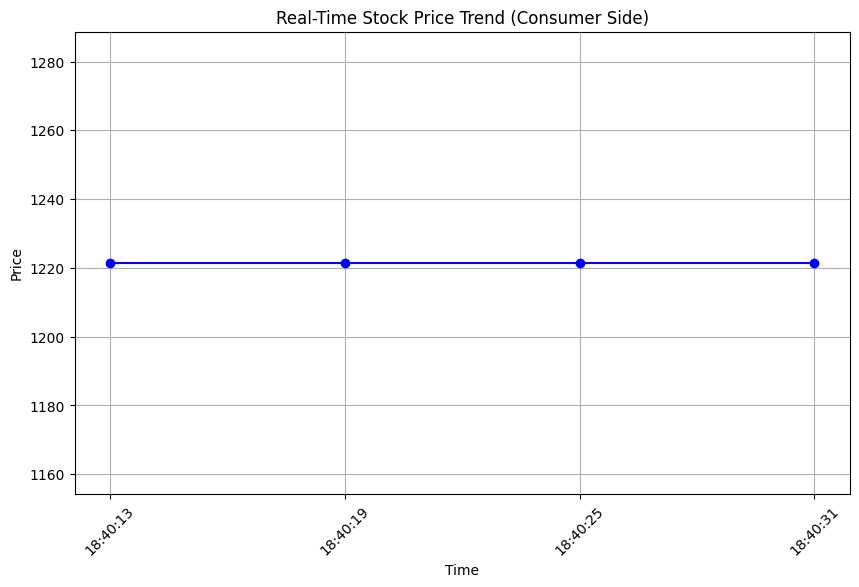

Data saved to S3 bucket stock-kafka-tanishq with filename s3://stock-kafka-tanishq/stock_data_2024-12-27_18-40-36.csv


KeyboardInterrupt: 

In [19]:

consumer = KafkaConsumer(
    'demo_test1',
    bootstrap_servers=['16.16.183.68:9092'],
    value_deserializer=lambda x: loads(x.decode('utf-8'))
)
data_list = []
fs = s3fs.S3FileSystem()
bucket_name = 'stock-kafka-tanishq'

def get_s3_filename():
    return f"s3://{bucket_name}/stock_data_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.csv"

print("Listening to Kafka topic: demo_test1")
for message in consumer:
    stock_data = message.value
    print(f"Received data: {stock_data}")
    
    data_list.append(stock_data)
    
    data = pd.DataFrame(data_list)

    plt.figure(figsize=(10, 6))
    plt.plot(data['Time'], data['Price'], marker='o', linestyle='-', color='blue')
    plt.title('Real-Time Stock Price Trend (Consumer Side)')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.grid()
    plt.pause(1) 
    
    s3_filename = get_s3_filename()  
    with fs.open(s3_filename, 'w') as f:
        data.to_csv(f, index=False)  
    print(f"Data saved to S3 bucket {bucket_name} with filename {s3_filename}")

    time.sleep(2)  
